In [1]:
#Importanto bibliotecas que ocuparemos
import matplotlib as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import datetime
import math

In [2]:
# Leemos el archivo de los datos meteorologicos con la siguiente función para empezar a trabajar.
df = pd.DataFrame( pd.read_csv("meteo-vid-2018.csv", engine="python" ) )


In [3]:
#Tipos de variables que tiene nuestro DataFrame
df.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [4]:
#Cambiamos el tipo de caracter en la columna de Date (de object a Date)
df['FECHA']=pd.to_datetime(df.apply(lambda x: x['Date'],1), dayfirst=True)
df=df.drop(['Date'],1)

In [5]:
df.dtypes

Time                        object
batt_volt_Min              float64
logger_temp                float64
short_up_Avg               float64
short_dn_Avg               float64
long_up_Avg                float64
long_dn_Avg                float64
cnr4_T_C_Avg               float64
cnr4_T_K_Avg               float64
long_up_corr_Avg           float64
long_dn_corr_Avg           float64
Rs_net_Avg                 float64
Rl_net_Avg                 float64
albedo_Avg                  object
Rn_Avg                     float64
AirTC_Avg                  float64
RH                         float64
WS_ms_S_WVT                float64
WindDir_D1_WVT             float64
WindDir_SD1_WVT            float64
Temp_C_Avg(1)              float64
Temp_C_Avg(2)              float64
Temp_C_Avg(3)              float64
Temp_C_Avg(4)               object
H. suelo 60                float64
Result2_Avg                float64
T. suelo 60 cm             float64
Result4_Avg                float64
Result5_Avg         

In [6]:
df.head()

,Time,batt_volt_Min,logger_temp,short_up_Avg,short_dn_Avg,long_up_Avg,long_dn_Avg,cnr4_T_C_Avg,cnr4_T_K_Avg,long_up_corr_Avg,...,Result2_Avg,T. suelo 60 cm,Result4_Avg,Result5_Avg,Result6_Avg,Result7_Avg,Result8_Avg,Result9_Avg,Riego,FECHA
0,17:00:00,12.39,28.43,36.15,7.23,-47.65,-13.43,27.69,300.84,416.77,...,0.04,24.33,75.80,0.04,14.16,13.37,14.46,13.46,0.0,2018-01-06
1,17:30:00,12.27,27.38,22.42,4.48,-56.17,-15.24,26.63,299.78,401.77,...,0.04,21.95,71.54,0.04,14.10,13.23,14.32,13.81,0.0,2018-01-06
2,18:00:00,12.22,26.30,1.41,0.28,-52.09,-15.60,24.90,298.05,395.37,...,0.04,21.34,70.38,0.04,14.31,13.12,14.51,13.84,0.0,2018-01-06
3,18:30:00,12.19,25.04,-2.77,-0.55,-51.42,-14.43,23.31,296.46,386.56,...,0.04,21.12,70.02,0.04,14.38,13.18,14.58,13.94,0.0,2018-01-06
4,19:00:00,12.17,23.92,-2.48,-0.50,-50.24,-13.61,22.48,295.63,382.87,...,0.04,21.10,70.00,0.04,14.41,13.32,14.60,14.11,0.0,2018-01-06


In [7]:
#Nuevo DataFrame
df1=pd.DataFrame([])

In [8]:
#Filtramos los datos del df1 que nos interesen
df1["MES"]=df["FECHA"].dt.month
df1["DIA"]=df["FECHA"].dt.day
df1["VEL_VIENTO"]=df["WS_ms_S_WVT"]
df1["TEMP_AIR"] = df["AirTC_Avg"]
df1["RH"] = df["RH"]
df1["RAD_SOL"] = df["Rs_net_Avg"]
df1["ALBEDO"]=df["albedo_Avg"]

In [9]:
df1.head()

,MES,DIA,VEL_VIENTO,TEMP_AIR,RH,RAD_SOL,ALBEDO
0,1.0,6.0,2.33,27.75,20.61,36.01,0.00
1,1.0,6.0,3.12,26.57,25.25,22.34,0.00
2,1.0,6.0,2.54,25.01,26.45,1.40,0.00
3,1.0,6.0,2.01,23.65,29.22,-3.15,-0.16
4,1.0,6.0,2.14,22.84,31.08,-2.84,-0.15


In [10]:
#Convertimos la variable ALBEDO a float64 para la parte 2:
df1['ALBEDO'] = df1['ALBEDO'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [11]:
#Cramos las columnas de los datos que necesitamos
df1["TMAX"] = df1.groupby(["MES"])["TEMP_AIR"].transform("max")
df1["TMIN"] = df1.groupby(["MES"])["TEMP_AIR"].transform("min")
df1["TEMP_MEAN"] = df1.groupby(["MES"])["TEMP_AIR"].transform("mean")

df1["RH_MAX"] = df1.groupby(["MES"])["RH"].transform("max")
df1["RH_MIN"] = df1.groupby(["MES"])["RH"].transform("min")
df1["RH_MEAN"] = df1.groupby(["MES"])["RH"].transform("mean")

df1["VEL_MEAN"] = df1.groupby(["MES"])["VEL_VIENTO"].transform("mean")
df1["RAD_SOL"] = df1.groupby(["MES"])["RAD_SOL"].transform("mean")

df1["ALBEDO_MEAN"]=df1.groupby(["MES"])["ALBEDO"].transform("mean")

In [12]:
df1.head()

,MES,DIA,VEL_VIENTO,TEMP_AIR,RH,RAD_SOL,ALBEDO,TMAX,TMIN,TEMP_MEAN,RH_MAX,RH_MIN,RH_MEAN,VEL_MEAN,ALBEDO_MEAN
0,1.0,6.0,2.33,27.75,20.61,111.861695,0.00,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,-0.423822
1,1.0,6.0,3.12,26.57,25.25,111.861695,0.00,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,-0.423822
2,1.0,6.0,2.54,25.01,26.45,111.861695,0.00,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,-0.423822
3,1.0,6.0,2.01,23.65,29.22,111.861695,-0.16,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,-0.423822
4,1.0,6.0,2.14,22.84,31.08,111.861695,-0.15,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,-0.423822


In [13]:
#Filtramos los datos que necesitamos para crear la tabla de promedios mensuales
df2 = pd.DataFrame([])
df2["MES"] = df1["MES"]
df2["TMAX"] = df1["TMAX"]
df2["TMIN"] = df1["TMIN"]
df2["TEMP_MEAN"] = df1["TEMP_MEAN"]
df2["RH_MAX"] = df1["RH_MAX"]
df2["RH_MIN"] = df1["RH_MIN"]
df2["RH_MEAN"] = df1["RH_MEAN"]
df2["VEL_MEAN"] = df1["VEL_MEAN"]
df2["RAD_SOL"] = df1["RAD_SOL"]
df2["ALBEDO_MEAN"]=df1["ALBEDO_MEAN"]

In [14]:
df2.head()

,MES,TMAX,TMIN,TEMP_MEAN,RH_MAX,RH_MIN,RH_MEAN,VEL_MEAN,RAD_SOL,ALBEDO_MEAN
0,1.0,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695,-0.423822
1,1.0,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695,-0.423822
2,1.0,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695,-0.423822
3,1.0,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695,-0.423822
4,1.0,33.35,0.54,16.963975,91.6,5.98,38.471432,1.943827,111.861695,-0.423822


In [15]:
#Dropeamos los datos repetidos y creamos las columnas de Latitud (º N), Longitud (º O) y Elevación (m)  28º 55.117' N, Longitud 111º 18.638' W, altitud 101m
#Conto finalmente obtendramos nuestra tabla de promedio mensuales
df2 = df2.drop_duplicates()
df2.index = np.arange(0,len(df2))
Latitud=[]
Longitud=[]
Elevacion=[]
for i in range (0,len(df2)):
    a = 28.918611
    b = -111.310639
    c = 101
    Latitud.append(a)
    Longitud.append(b)
    Elevacion.append(c)
df2["LATITUD"] = Latitud
df2["LONGITUD"] = Longitud
df2["ELEVACIÓN"] = Elevacion

In [16]:
#Visualizamos la tabla de promedios mensuales
df2

,MES,TMAX,TMIN,TEMP_MEAN,RH_MAX,RH_MIN,RH_MEAN,VEL_MEAN,RAD_SOL,ALBEDO_MEAN,LATITUD,LONGITUD,ELEVACIÓN
0,1.0,33.35,0.54,16.963975,91.60,5.98,38.471432,1.943827,111.861695,-0.423822,28.918611,-111.310639,101
1,2.0,31.47,0.07,17.230275,99.53,6.76,48.168006,1.964189,126.347812,-0.479545,28.918611,-111.310639,101
2,3.0,35.22,3.06,19.282359,89.73,6.76,36.968353,1.926196,170.105269,-0.409137,28.918611,-111.310639,101
3,4.0,36.30,5.43,21.880618,93.40,5.23,40.785667,2.101812,213.415993,-0.386088,28.918611,-111.310639,101
4,5.0,38.18,7.13,23.650034,94.60,8.19,44.233468,2.113918,237.177688,-0.367835,28.918611,-111.310639,101
5,6.0,41.47,13.12,28.416187,98.37,5.34,50.810507,2.154986,224.636062,-0.381934,28.918611,-111.310639,101
6,7.0,44.94,18.71,31.065726,97.00,13.10,57.639805,2.022204,200.421983,-0.189610,28.918611,-111.310639,101
7,8.0,40.24,22.71,30.120894,98.60,30.16,68.868454,1.910853,189.466922,-0.381667,28.918611,-111.310639,101
8,9.0,41.39,19.43,29.661271,98.03,21.32,66.619750,1.790326,183.133271,-0.486379,28.918611,-111.310639,101
9,10.0,35.82,10.23,23.254207,98.47,17.32,68.696082,1.664435,148.386203,-0.614787,28.918611,-111.310639,101


In [17]:
#Quitamos la ultima fila que no nos sirve
df2.drop(df2.index[[12]])

,MES,TMAX,TMIN,TEMP_MEAN,RH_MAX,RH_MIN,RH_MEAN,VEL_MEAN,RAD_SOL,ALBEDO_MEAN,LATITUD,LONGITUD,ELEVACIÓN
0,1.0,33.35,0.54,16.963975,91.60,5.98,38.471432,1.943827,111.861695,-0.423822,28.918611,-111.310639,101
1,2.0,31.47,0.07,17.230275,99.53,6.76,48.168006,1.964189,126.347812,-0.479545,28.918611,-111.310639,101
2,3.0,35.22,3.06,19.282359,89.73,6.76,36.968353,1.926196,170.105269,-0.409137,28.918611,-111.310639,101
3,4.0,36.30,5.43,21.880618,93.40,5.23,40.785667,2.101812,213.415993,-0.386088,28.918611,-111.310639,101
4,5.0,38.18,7.13,23.650034,94.60,8.19,44.233468,2.113918,237.177688,-0.367835,28.918611,-111.310639,101
5,6.0,41.47,13.12,28.416187,98.37,5.34,50.810507,2.154986,224.636062,-0.381934,28.918611,-111.310639,101
6,7.0,44.94,18.71,31.065726,97.00,13.10,57.639805,2.022204,200.421983,-0.189610,28.918611,-111.310639,101
7,8.0,40.24,22.71,30.120894,98.60,30.16,68.868454,1.910853,189.466922,-0.381667,28.918611,-111.310639,101
8,9.0,41.39,19.43,29.661271,98.03,21.32,66.619750,1.790326,183.133271,-0.486379,28.918611,-111.310639,101
9,10.0,35.82,10.23,23.254207,98.47,17.32,68.696082,1.664435,148.386203,-0.614787,28.918611,-111.310639,101


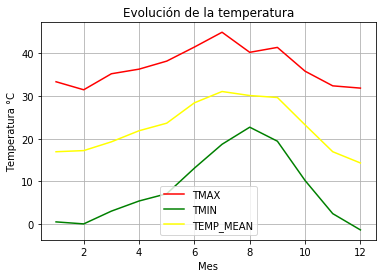

In [18]:
#Creamos la gráfica de la evolucion de la temperatura

plt.plot(df2.MES, df2.TMAX,color = 'RED')
plt.plot(df2.MES, df2.TMIN,color = "GREEN")
plt.plot(df2.MES, df2.TEMP_MEAN, color="YELLOW")
plt.title("Evolución de la temperatura")
plt.ylabel("Temperatura °C")
plt.xlabel("Mes")
plt.legend(('TMAX','TMIN','TEMP_MEAN'))
plt.grid(True)
plt.show()

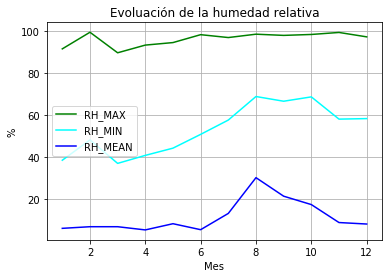

In [19]:
#Creamos la gráfica de humeda relativa

plt.plot(df2.MES, df2.RH_MAX, color='GREEN')
plt.plot(df2.MES, df2.RH_MEAN, color='CYAN')
plt.plot(df2.MES, df2.RH_MIN, color='BLUE')
plt.title("Evoluación de la humedad relativa")
plt.ylabel("%")
plt.xlabel("Mes")
plt.legend(('RH_MAX','RH_MIN','RH_MEAN'))
plt.grid(True)
plt.show()

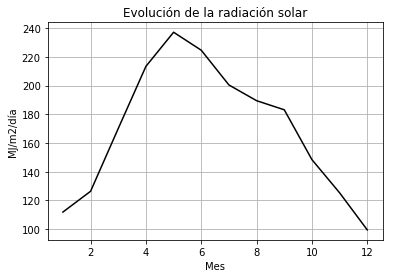

In [20]:
#Gráfica de radiación solar

plt.plot(df2.MES, df2.RAD_SOL, color='black')
plt.title("Evolución de la radiación solar")
plt.ylabel("MJ/m2/día")
plt.xlabel("Mes")
plt.grid(True)
plt.show()

In [21]:
#Empezamos la parte 2

In [22]:
#Valiantzas (2012): Valiantzas 1

phi = (math.pi/180)*28.94917
ETo2 = []
for i in range (0,len(df2)):
    ETo2.append(0.0393*df2['RAD_SOL'][i]*(df2['TEMP_MEAN'][i] + 9.5)**0.5 - 0.19*(df2['RAD_SOL'][i]**0.6)*(phi**0.15) + 0.0061*(df2['TEMP_MEAN'][i] + 20)*(1.12*df2['TEMP_MEAN'][i] - df2['TMIN'][i] - 2)**0.7)

In [23]:
#Jensen and Haise (1963):
ETo1 = []
for i in range (0,len(df2)):
    ETo1.append((0.0252*df2['TEMP_MEAN'][i] + 0.078)*df2['RAD_SOL'][i])


In [24]:
#Valiantzas (2013): Valiantzas 4
#Primero obtenemos Ra
dr = []
delta = []
omega = []

for m in range (0,len(df2)):
    α = df2['ALBEDO_MEAN'][i]
    j = int(30.4*m - 15)
    dr.append(1 + 0.033*math.cos(((2*math.pi)/365)*j))
    delta.append(0.409*math.sin(((2*math.pi)/365)*j - 1.39))
    omega.append(math.acos(-math.tan(phi)*math.tan(0.409*math.sin(((2*math.pi)/365)*j - 1.39))))

In [25]:
#Salvamos nuestros datos en un nuevo DataFrame
df3 = pd.DataFrame()
df3['dr'] = dr
df3['delta'] = delta
df3['omega'] = omega
df3 = df3.apply(pd.to_numeric, errors='coerce')

phi = (math.pi/180)*28.94917

df3.head()

,dr,delta,omega
0,1.031906,-0.407775,1.329507
1,1.031906,-0.370216,1.354428
2,1.023584,-0.236097,1.437322
3,1.008564,-0.033386,1.552321
4,0.991711,0.172248,1.667178


In [26]:
#Calculamos Ra por mes:
Ra = []
for i in range (0,len(df2)):
    Ra.append(((24*60)/math.pi)*0.0820*(df3['omega'][i]*math.sin(phi)*math.sin(df3['delta'][i]) + math.cos(phi)*math.cos(df3['delta'][i])*math.sin(df3['omega'][i])))

In [27]:
df3['Ra'] = Ra
df3['Ra'] = df3['Ra'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [28]:
#Calculamos la ecuación 34:
ETo3 = [] 
for i in range (0,len(df2)):
    ETo3.append(0.051*(1 - df2['ALBEDO_MEAN'][i])*df2['RAD_SOL'][i]*(df2['TEMP_MEAN'][i] + 9.5)**0.5 - 2.4*(df2['RAD_SOL'][i]/df3['Ra'][i])**2 + 0.048*(df2['TEMP_MEAN'][i] + 20)*(1 - df2['RH_MEAN'][i]/100)*(0.5 + 0.536*df2['VEL_MEAN'][i]) + 0.00012*101)

In [29]:
#Creamos un DataFrame para la  Evapotranspiración calculada con las 3 ecuaciones que calculamos anteriormente
ETo = {'ETo1': ETo1, 'ETo2': ETo2, 'ETo3':ETo3}
ETo = pd.DataFrame(data=ETo)
ETo

,ETo1,ETo2,ETo3
0,56.545212,21.309738,-33.695233
1,64.715721,24.210133,-35.880981
2,95.924988,33.834386,-38.744126
3,134.322228,44.562518,-20.804563
4,159.853219,51.066549,0.926167
5,178.380785,52.063187,27.604957
6,172.534524,48.025784,25.444132
7,158.592629,44.307024,35.735122
8,151.169927,42.834884,34.802577
9,98.529331,31.588497,24.948026


In [30]:
#Empezamos la parte 3


In [31]:
# Leemos el archivo de los datos de flujo.
dfa = pd.DataFrame( pd.read_csv("flujos-vid-2018.csv", engine="python" ) )

In [32]:
dfa.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [33]:
#Creamos un DataFrame con los datos que vamos a utilizar
dfb=pd.DataFrame([])

dfb["HORA"] = dfa["Hour"]
dfb["DIA"] = dfa["DoY"]
dfb["AÑO"] = dfa["Year"]
dfb["RAD_NET"] = dfa["Rg_f"]
dfb["CALOR_LAT"] = dfa["LE_f"]
dfb["CALOR_SENS"] = dfa["H_f"]
dfb.head()

,HORA,DIA,AÑO,RAD_NET,CALOR_LAT,CALOR_SENS
0,--,--,--,Wm-2,Wm-2,Wm-2
1,0.5,7,2018,-0.87,11.52,-20.04
2,1,7,2018,-0.97,15.11,-7.34
3,1.5,7,2018,-0.96,8.61,-9.76
4,2,7,2018,-2.06,1.93,-8.55


In [34]:
#Quitamos la primera fila que no nos da información útil
dfb = dfb.drop(dfb.index[[0]])
dfb.head()

,HORA,DIA,AÑO,RAD_NET,CALOR_LAT,CALOR_SENS
1,0.5,7,2018,-0.87,11.52,-20.04
2,1,7,2018,-0.97,15.11,-7.34
3,1.5,7,2018,-0.96,8.61,-9.76
4,2,7,2018,-2.06,1.93,-8.55
5,2.5,7,2018,-1.32,6.40,-0.55


In [35]:

dfb = dfb.apply(pd.to_numeric, errors='coerce')
dfb = dfb.reset_index(drop=True)


In [36]:
dfc=pd.DataFrame([])

RAD=[]
CA_LA=[]
CA_SE=[]
DIA=[]
AÑO=[]
HORA=[]

for i in range (0,len(dfb)):
    if dfb.DIA[i]<32:
        RAD.append(dfb.RAD_NET[i])
        CA_LA.append(dfb.CALOR_LAT[i])
        CA_SE.append(dfb.CALOR_SENS[i])
        AÑO.append(dfb.AÑO[i])
        HORA.append(dfb.HORA[i])
        DIA.append(dfb.DIA[i])
        
dfc["RAD_NET"] = RAD
dfc["CALOR_LAT"] = CA_LA
dfc["CALOR_SENS"] = CA_SE
dfc["HORA"] = HORA

In [37]:
#Agrupamos por hora y quitamos las datos repetidos
dfc["RAD_NET"] = dfb.groupby(["HORA"])["RAD_NET"].transform("mean")
dfc["CALOR_LAT"] = dfb.groupby(["HORA"])["CALOR_LAT"].transform("mean")
dfc["CALOR_SENS"] = dfb.groupby(["HORA"])["CALOR_SENS"].transform("mean")
dfc = dfc.drop_duplicates()

In [38]:
dfc.head()

,RAD_NET,CALOR_LAT,CALOR_SENS,HORA
0,-1.676295,4.328268,-7.451123,0.5
1,-1.673203,3.148412,-6.646295,1.0
2,-1.621616,4.676462,-7.123287,1.5
3,-1.576880,4.483637,-7.540920,2.0
4,-1.571114,4.491677,-7.876099,2.5


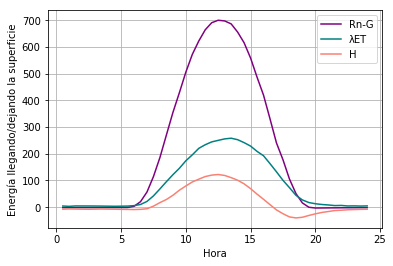

In [50]:
#Creamos la gráfica de balance energía promedio 
plt.plot(dfc.HORA, dfc.RAD_NET, color="purple")
plt.plot(dfc.HORA, dfc.CALOR_LAT, color="teal")
plt.plot(dfc.HORA, dfc.CALOR_SENS, color="salmon")
plt.ylabel("Energía llegando/dejando la superficie")
plt.xlabel("Hora")
plt.legend(('Rn-G','λET',"H"))
plt.grid(True)
plt.show()
